In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 20

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:/Users/Tony PC/Desktop/MBA BDIA1/python/cancer_reg/cancer_reg.csv")

In [5]:
sep = "-"*50

**Dataset sur la mortalité du cancer aux USA par comté.**   
**Étude socio-économique, d'un point de vue macro.**

In [6]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# I) Nettoyage

## 1) Résolution NaN

In [7]:
df.shape

(3047, 33)

In [8]:
miss_perc = df.isnull().sum()/df.shape[0]
miss_perc

avganncount             0.0
avgdeathsperyear        0.0
target_deathrate        0.0
incidencerate           0.0
medincome               0.0
                       ... 
pctblack                0.0
pctasian                0.0
pctotherrace            0.0
pctmarriedhouseholds    0.0
birthrate               0.0
Length: 33, dtype: float64

In [9]:
missing_col = [col for col in miss_perc > 0]

In [10]:
np.where(missing_col)[0]

array([16, 20, 23], dtype=int64)

In [11]:
miss_list = miss_perc.index[np.where(missing_col)[0]]
miss_list[0]

'pctsomecol18_24'

In [12]:
for i in range(len(miss_list)):
    print([miss_list[i]])
    print(df[miss_list[i]].describe())
    print(sep)

['pctsomecol18_24']
count    762.000000
mean      40.977034
std       11.115805
min        7.100000
25%       34.000000
50%       40.400000
75%       46.400000
max       79.000000
Name: pctsomecol18_24, dtype: float64
--------------------------------------------------
['pctemployed16_over']
count    2895.000000
mean       54.152642
std         8.315064
min        17.600000
25%        48.600000
50%        54.500000
75%        60.300000
max        80.100000
Name: pctemployed16_over, dtype: float64
--------------------------------------------------
['pctprivatecoveragealone']
count    2438.000000
mean       48.453774
std        10.083006
min        15.700000
25%        41.000000
50%        48.700000
75%        55.600000
max        78.900000
Name: pctprivatecoveragealone, dtype: float64
--------------------------------------------------


### Choix de remplacement par mediane

In [13]:
df1 = df.copy()

In [14]:
for i in range(len(miss_list)):
    df1[miss_list[i]].fillna(df1[miss_list[i]].median(), inplace = True)

In [15]:
df1.isnull().sum()/df.shape[0]

avganncount             0.0
avgdeathsperyear        0.0
target_deathrate        0.0
incidencerate           0.0
medincome               0.0
                       ... 
pctblack                0.0
pctasian                0.0
pctotherrace            0.0
pctmarriedhouseholds    0.0
birthrate               0.0
Length: 33, dtype: float64

In [16]:
for i in range(len(miss_list)):
    print([miss_list[i]])
    print(df1[miss_list[i]].describe())
    print(sep)

['pctsomecol18_24']
count    3047.000000
mean       40.544306
std         5.561696
min         7.100000
25%        40.400000
50%        40.400000
75%        40.400000
max        79.000000
Name: pctsomecol18_24, dtype: float64
--------------------------------------------------
['pctemployed16_over']
count    3047.000000
mean       54.169970
std         8.105295
min        17.600000
25%        48.900000
50%        54.500000
75%        60.000000
max        80.100000
Name: pctemployed16_over, dtype: float64
--------------------------------------------------
['pctprivatecoveragealone']
count    3047.000000
mean       48.502987
std         9.019423
min        15.700000
25%        43.100000
50%        48.700000
75%        53.800000
max        78.900000
Name: pctprivatecoveragealone, dtype: float64
--------------------------------------------------


### Divergence trop grande avec "pctsomecol18_24", choix de le retirer (75% de manquant)

In [17]:
df1.drop(["pctsomecol18_24"], axis = 1, inplace = True)

## 2) Vérification dataset

### Data leak 

avgdeathsperyear renvoie à la même chose que notre target, en effet c'est juste la variable brute sur la mortalité du cancer non rapporté aux 100 000 habitants.  
Cela n'est donc pas informatif et même problématique pour le modèle.

In [18]:
df1.drop(['avgdeathsperyear'], axis=1, inplace = True)

### Doublon (plusieurs fois le même comté)

In [19]:
(df["geography"].value_counts() > 1).sum()

0

# II) Analyse approndie

## 1) Outliers

### Boxplot pour Variable.max > 2.5x 3ème quartile (Outlier)

In [20]:
df1.dtypes.value_counts()

float64    27
int64       2
object      2
dtype: int64

In [21]:
numeric_col = []

for columns in df1:
    if not df1[columns].dtypes == 'object':
        numeric_col.append(columns)
        
df1_num = df1[numeric_col]

In [22]:
def out_graph(df_var):
    plt.figure()
    plt.title(df_var.name)
    plt.boxplot(df_var)
    plt.show()
    print(df_var.describe())
    print(sep)

In [23]:
outlier_col = []
def outlier_scan(df):
    for columns in df:
        if (df[columns].max() > (df[columns].describe()['75%'] * 2.5)):
            out_graph(df[columns])
            outlier_col.append(columns)
    return

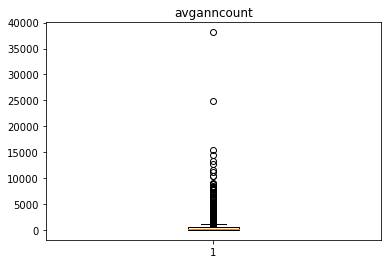

count     3047.000000
mean       606.338544
std       1416.356223
min          6.000000
25%         76.000000
50%        171.000000
75%        518.000000
max      38150.000000
Name: avganncount, dtype: float64
--------------------------------------------------


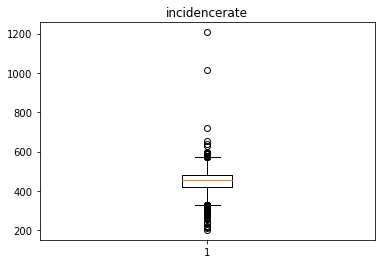

count    3047.000000
mean      448.268586
std        54.560733
min       201.300000
25%       420.300000
50%       453.549422
75%       480.850000
max      1206.900000
Name: incidencerate, dtype: float64
--------------------------------------------------


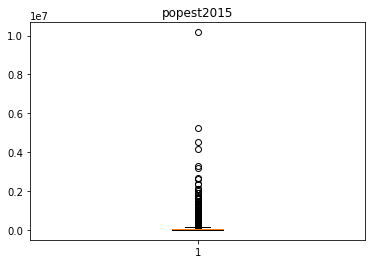

count    3.047000e+03
mean     1.026374e+05
std      3.290592e+05
min      8.270000e+02
25%      1.168400e+04
50%      2.664300e+04
75%      6.867100e+04
max      1.017029e+07
Name: popest2015, dtype: float64
--------------------------------------------------


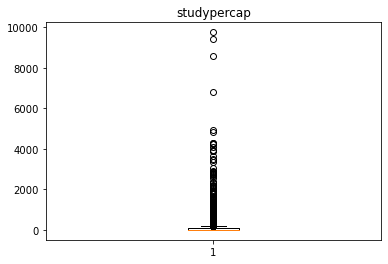

count    3047.000000
mean      155.399415
std       529.628366
min         0.000000
25%         0.000000
50%         0.000000
75%        83.650776
max      9762.308998
Name: studypercap, dtype: float64
--------------------------------------------------


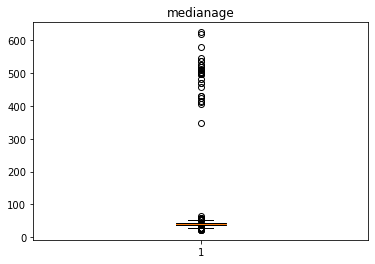

count    3047.000000
mean       45.272333
std        45.304480
min        22.300000
25%        37.700000
50%        41.000000
75%        44.000000
max       624.000000
Name: medianage, dtype: float64
--------------------------------------------------


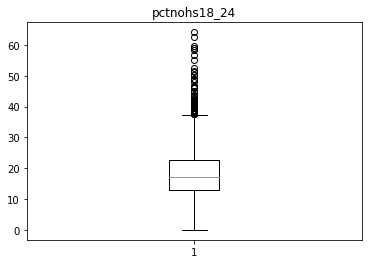

count    3047.000000
mean       18.224450
std         8.093064
min         0.000000
25%        12.800000
50%        17.100000
75%        22.700000
max        64.100000
Name: pctnohs18_24, dtype: float64
--------------------------------------------------


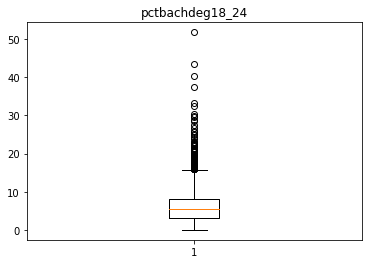

count    3047.000000
mean        6.158287
std         4.529059
min         0.000000
25%         3.100000
50%         5.400000
75%         8.200000
max        51.800000
Name: pctbachdeg18_24, dtype: float64
--------------------------------------------------


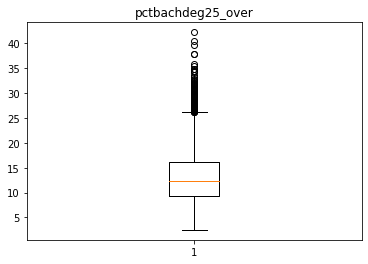

count    3047.000000
mean       13.282015
std         5.394756
min         2.500000
25%         9.400000
50%        12.300000
75%        16.100000
max        42.200000
Name: pctbachdeg25_over, dtype: float64
--------------------------------------------------


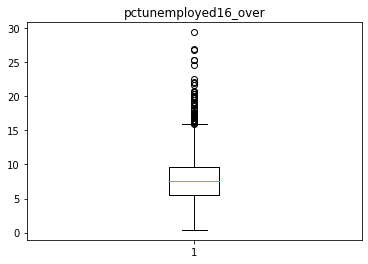

count    3047.000000
mean        7.852412
std         3.452371
min         0.400000
25%         5.500000
50%         7.600000
75%         9.700000
max        29.400000
Name: pctunemployed16_over, dtype: float64
--------------------------------------------------


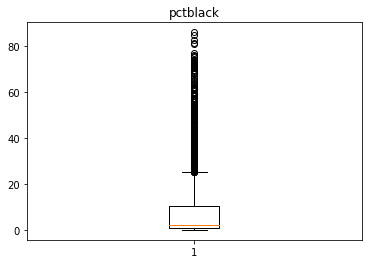

count    3047.000000
mean        9.107978
std        14.534538
min         0.000000
25%         0.620675
50%         2.247576
75%        10.509732
max        85.947799
Name: pctblack, dtype: float64
--------------------------------------------------


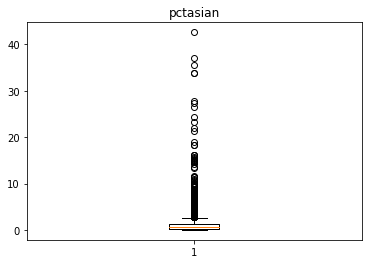

count    3047.000000
mean        1.253965
std         2.610276
min         0.000000
25%         0.254199
50%         0.549812
75%         1.221037
max        42.619425
Name: pctasian, dtype: float64
--------------------------------------------------


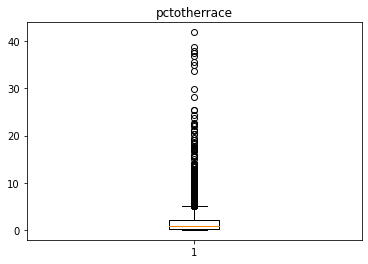

count    3047.000000
mean        1.983523
std         3.517710
min         0.000000
25%         0.295172
50%         0.826185
75%         2.177960
max        41.930251
Name: pctotherrace, dtype: float64
--------------------------------------------------


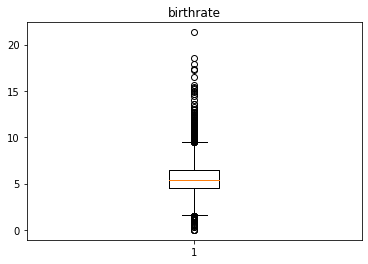

count    3047.000000
mean        5.640306
std         1.985816
min         0.000000
25%         4.521419
50%         5.381478
75%         6.493677
max        21.326165
Name: birthrate, dtype: float64
--------------------------------------------------


In [24]:
outlier_scan(df1_num)

In [25]:
len(outlier_col)

13

**Une copie du dataset, sans l'amputation des outliers, est nécessaire pour une comparaison dans les modèles.**

In [26]:
df2 = df1.copy()

### a. Problème avec l'âge médian, valeur abérante

In [27]:
def outlier_df(nom, df_col, df=df1):
        nom = df.loc[df_col> (df_col.describe()['75%']*(2.5))]

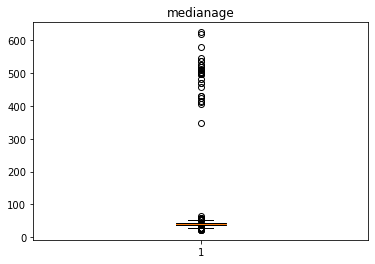

count    3047.000000
mean       45.272333
std        45.304480
min        22.300000
25%        37.700000
50%        41.000000
75%        44.000000
max       624.000000
Name: medianage, dtype: float64
--------------------------------------------------


In [28]:
out_graph(df1['medianage'])

In [29]:
outlier_age = df1.loc[df1['medianage']> (df1['medianage'].describe()['75%']*(2.5))]
outlier_age

,avganncount,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
100,89.0,152.3,447.2,61802,17110,8.2,0.000000,"(61494.5, 125635]",458.4,36.3,40.7,"Seward County, Nebraska",58.1,4.3,22.7,6.2,29.5,18.0,63.4,3.5,83.4,67.6,55.0,24.3,9.0,96.476056,0.352983,0.482410,1.194258,60.491493,9.675646
181,564.0,135.7,395.4,56142,139394,12.6,0.000000,"(54545.6, 61494.5]",469.2,37.6,40.1,"Sandoval County, New Mexico",49.7,17.8,30.7,2.9,25.9,16.6,55.1,9.2,63.8,48.7,43.1,35.9,21.1,69.971750,2.662510,1.383949,9.734481,51.876656,5.497053
225,346.0,176.8,399.0,44207,62194,14.6,0.000000,"(42724.4, 45201]",546.0,44.2,46.7,"Pittsylvania County, Virginia",53.5,14.7,40.7,6.3,35.3,9.4,53.9,7.7,66.2,48.7,42.6,36.2,18.6,74.844730,21.417651,0.342389,1.576584,51.591360,4.194566
318,186.0,193.4,406.2,37122,25345,19.0,0.000000,"(34218.1, 37413.8]",624.0,51.6,52.5,"Iosco County, Michigan",52.2,25.2,32.4,2.2,40.0,10.0,40.4,12.1,61.4,34.2,29.4,53.2,23.4,96.145821,0.625960,0.519665,0.141727,48.108966,4.012841
425,230.0,198.1,477.8,45841,39259,18.7,0.000000,"(45201, 48021.6]",508.8,41.5,43.4,"Person County, North Carolina",47.6,22.2,28.0,5.1,35.5,11.3,53.0,11.9,60.0,45.4,37.9,39.3,22.3,68.766237,27.377617,0.430442,1.533289,45.407268,6.140351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,95.0,159.3,469.0,32903,15658,28.8,0.000000,"[22640, 34218.1]",496.8,38.9,44.8,"Brooks County, Georgia",46.9,28.4,35.9,1.0,38.0,9.0,45.4,17.0,48.4,33.7,28.2,42.8,25.6,59.154569,35.160197,0.511607,3.696361,43.591303,4.200665
2789,25.0,229.8,555.7,34936,5685,27.2,0.000000,"(34218.1, 37413.8]",349.2,28.9,29.3,"Dewey County, South Dakota",34.6,35.2,35.5,0.9,35.4,9.1,54.5,24.6,29.6,48.7,18.4,39.6,32.9,21.724323,0.035849,0.000000,0.035849,36.829268,6.625097
2835,769.0,172.5,494.2,47175,127253,14.7,15.716722,"(45201, 48021.6]",511.2,41.0,43.9,"Blount County, Tennessee",55.8,15.4,40.6,5.7,34.9,15.0,54.5,7.8,68.7,51.7,45.4,35.1,17.5,94.155191,2.902035,0.754066,0.270793,55.668631,4.324151
2895,281.0,168.0,433.2,57126,51659,11.4,0.000000,"(54545.6, 61494.5]",498.0,40.1,43.1,"Ogle County, Illinois",55.0,12.3,31.5,8.1,33.7,12.9,60.0,8.0,75.0,59.2,52.6,31.3,15.5,95.083688,1.131744,0.345440,1.633681,53.986783,5.772258


In [30]:
len(outlier_age)

30

Décision de diviser par 10 car entre 30 et 60 cela peut correspondre au vrai âge médian.  
Modification aussi dans le df2 car cela est surement une erreur de saisie.

In [31]:
df1['medianage'].loc[df1['medianage']> (df1['medianage'].describe()['75%']*(2.5))] = df1['medianage'].loc[df1['medianage']> (df1['medianage'].describe()['75%']*(2.5))] / 10
df2['medianage'].loc[df1['medianage']> (df1['medianage'].describe()['75%']*(2.5))] = df2['medianage'].loc[df1['medianage']> (df1['medianage'].describe()['75%']*(2.5))] / 10

In [32]:
df1['medianage'].describe()

count    3047.000000
mean       40.906964
std         5.271319
min        22.300000
25%        37.700000
50%        41.000000
75%        43.900000
max        65.300000
Name: medianage, dtype: float64

### b. Grande population

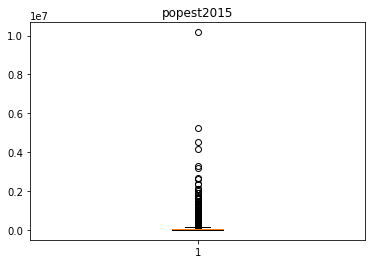

count    3.047000e+03
mean     1.026374e+05
std      3.290592e+05
min      8.270000e+02
25%      1.168400e+04
50%      2.664300e+04
75%      6.867100e+04
max      1.017029e+07
Name: popest2015, dtype: float64
--------------------------------------------------


In [33]:
out_graph(df1['popest2015'])

In [34]:
outlier_popest2015 = df1.loc[df1['popest2015']> (df1['popest2015'].describe()['75%']*(2.5))]
outlier_popest2015

,avganncount,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,48.7,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
9,4025.0,177.8,510.9,60397,843954,13.1,427.748432,"(54545.6, 61494.5]",35.8,34.7,37.0,"Pierce County, Washington",50.0,15.6,36.3,7.1,28.8,16.2,56.6,9.2,69.9,48.7,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430
13,3438.0,165.3,493.4,71890,772501,9.9,138.511148,"(61494.5, 125635]",37.6,36.6,38.7,"Snohomish County, Washington",52.1,15.4,33.3,8.3,24.3,20.9,62.1,7.5,73.3,61.6,54.3,25.9,14.1,78.832738,2.595851,9.511513,2.252720,52.720497,4.729251
14,2265.0,171.0,440.7,50083,490945,16.3,462.373586,"(48021.6, 51046.4]",37.2,35.7,38.7,"Spokane County, Washington",49.4,10.9,29.3,8.6,25.7,18.1,55.1,8.4,65.2,50.6,42.5,36.5,21.4,89.038167,1.827041,2.315986,1.033625,48.188377,5.355836
16,1390.0,169.9,495.9,61653,269536,11.9,207.764454,"(61494.5, 125635]",38.5,37.1,39.9,"Thurston County, Washington",52.4,14.8,31.7,7.4,22.7,20.3,56.5,8.5,74.5,55.4,43.5,30.7,13.7,82.586222,2.839873,5.835804,1.226387,50.874492,5.180155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,1590.0,170.7,435.7,48651,368450,15.2,222.553942,"(48021.6, 51046.4]",35.6,34.6,36.6,"Allen County, Indiana",49.5,17.3,29.9,9.6,29.4,17.5,61.4,8.0,66.9,48.7,50.4,29.1,17.6,79.486756,11.573161,3.162995,2.071795,47.380031,6.597187
2946,891.0,170.1,442.7,50192,203474,13.9,575.012041,"(48021.6, 51046.4]",35.2,34.1,36.0,"Elkhart County, Indiana",52.2,27.3,36.1,3.3,36.9,12.3,60.5,7.4,59.8,48.6,44.0,30.8,19.1,86.219698,5.785186,1.073822,4.036176,53.145275,7.223842
2975,1082.0,169.4,474.8,62700,219916,9.3,386.511213,"(61494.5, 125635]",37.1,36.0,38.0,"Linn County, Iowa",51.2,9.9,23.8,10.6,27.2,21.6,67.0,4.8,78.1,63.0,56.9,28.8,13.8,89.746584,4.222212,1.986244,0.938885,48.978447,5.753829
2995,2000.0,188.7,481.1,61028,467711,13.1,1231.529727,"(54545.6, 61494.5]",35.0,34.1,35.9,"Polk County, Iowa",51.1,12.6,29.1,14.2,25.3,25.1,68.3,5.8,74.6,48.7,55.6,29.9,16.5,85.384056,6.242912,3.942578,1.506292,48.582031,6.463150


In [35]:
def tendance_outlier(outlier):
    for col in numeric_col:
        proport = outlier[col].mean() / df2[col].mean()
        if proport > 1.1 or proport < 0.9:
            print("Colonne", col, ":", proport)
            print(sep)

In [36]:
tendance_outlier(outlier_popest2015)

Colonne avganncount : 4.418784946664938
--------------------------------------------------
Colonne medincome : 1.238448788678024
--------------------------------------------------
Colonne popest2015 : 5.788448637006516
--------------------------------------------------
Colonne povertypercent : 0.865281427916015
--------------------------------------------------
Colonne studypercap : 1.7506231024815395
--------------------------------------------------
Colonne medianage : 0.8311666220301361
--------------------------------------------------
Colonne pctnohs18_24 : 0.7615722153605271
--------------------------------------------------
Colonne pcths18_24 : 0.8440797226735692
--------------------------------------------------
Colonne pctbachdeg18_24 : 1.695392022911551
--------------------------------------------------
Colonne pcths25_over : 0.7617455489284634
--------------------------------------------------
Colonne pctbachdeg25_over : 1.4959832515105338
-----------------------------------

In [37]:
df1.drop(outlier_popest2015.index, axis=0, inplace =True)

Constat: 
- Plus de d'argent, moins de pauvreté
- Plus d'essaie clinique liées au cancer
- Plus de gens éduqué
- Plus de personne issue des minorités
- Couverture privé plus large

In [38]:
df1.shape

(2681, 31)

Elimination autres outlier

In [39]:
for col in numeric_col:
    limite = df1[col].describe()['75%'] * 2.5
    outlier = df1.loc[df1[col] > limite]
    df1.drop(outlier.index, axis=0, inplace =True)

In [40]:
df1.shape

(1238, 31)

## 2) Analyse graphique

Utilisation de df2 pour une analyse réaliste

### a. Régression linéaire

In [41]:
def graph_reg(df_col_target, df = df2):
    for col in numeric_col:
        plt.figure()
        plt.title(col)
        sns.regplot(x= df[col], y = df_col_target, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
        plt.show()

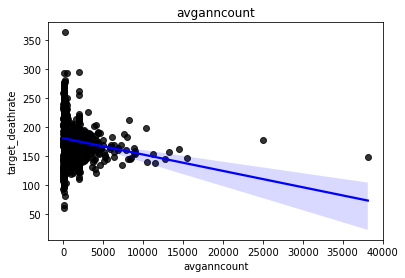

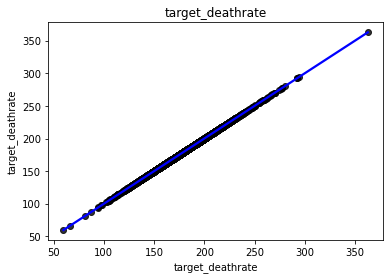

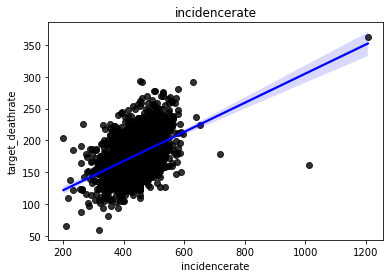

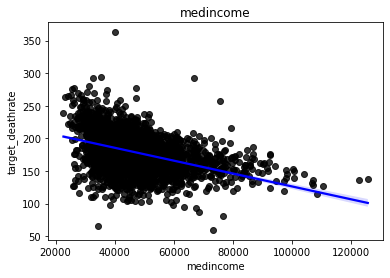

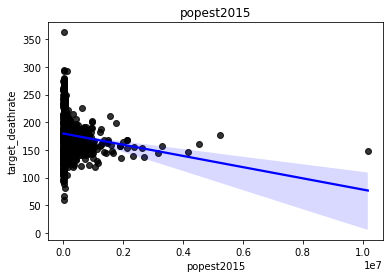

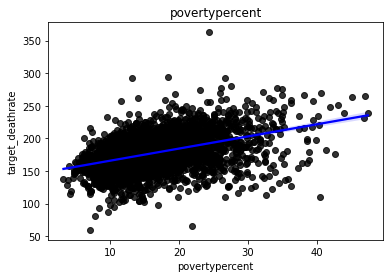

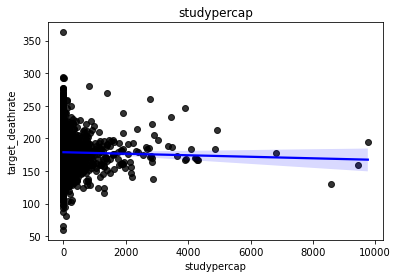

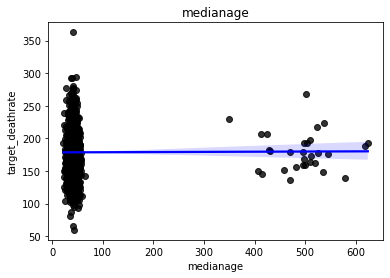

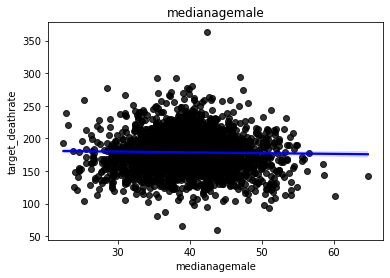

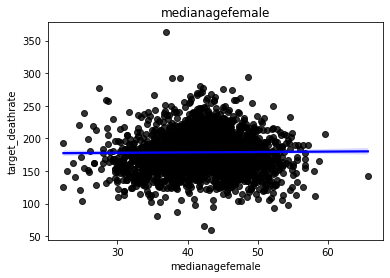

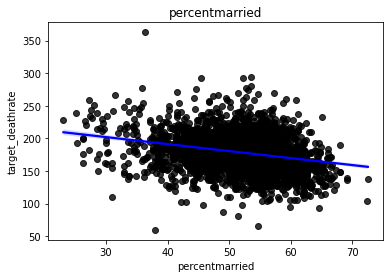

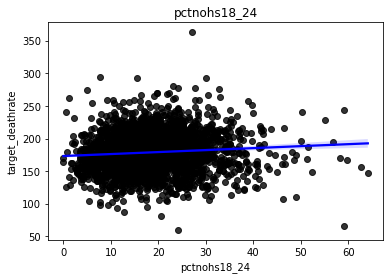

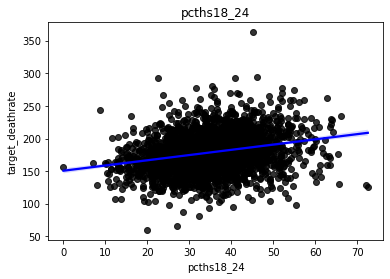

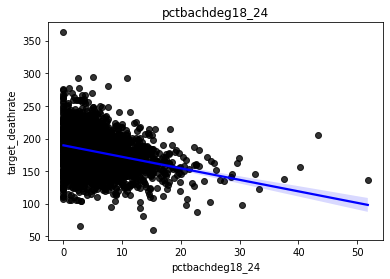

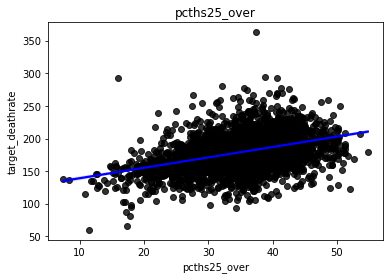

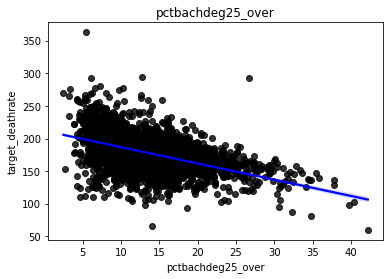

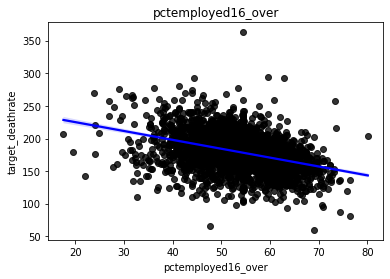

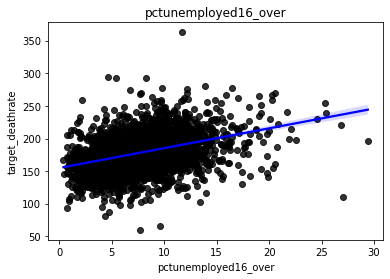

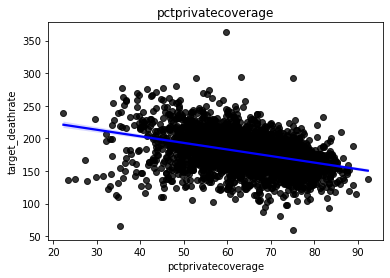

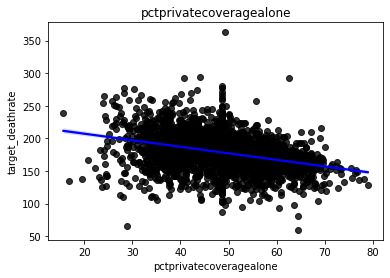

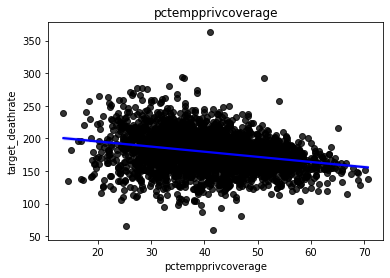

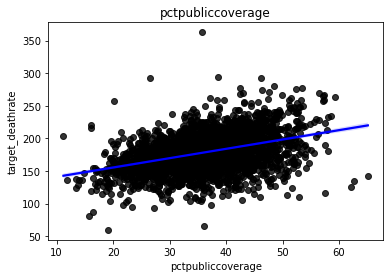

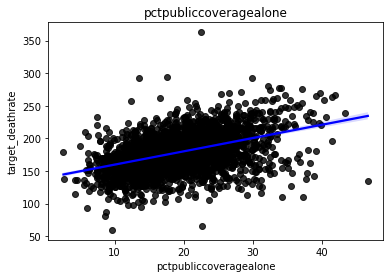

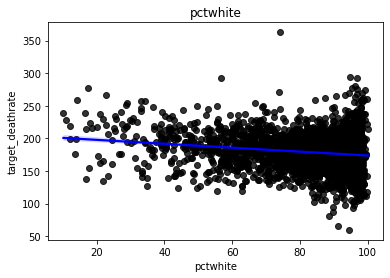

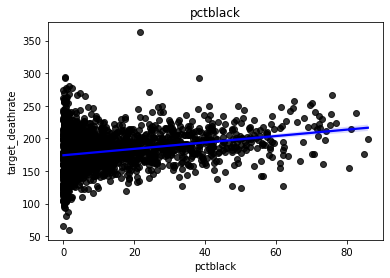

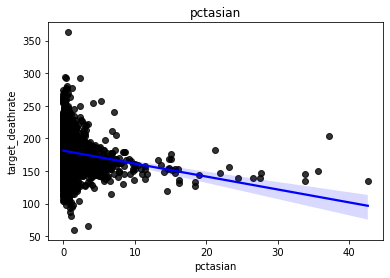

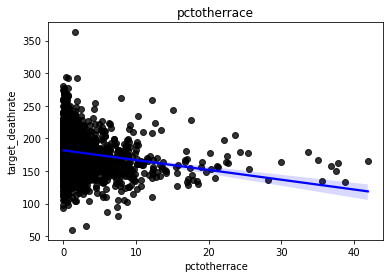

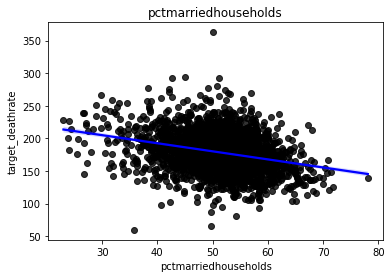

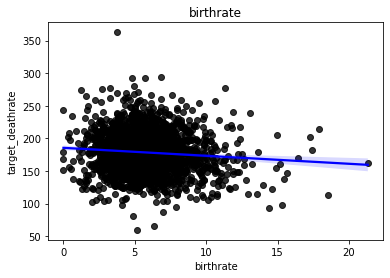

In [42]:
graph_reg(df2['target_deathrate'])

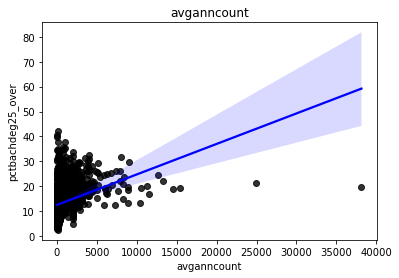

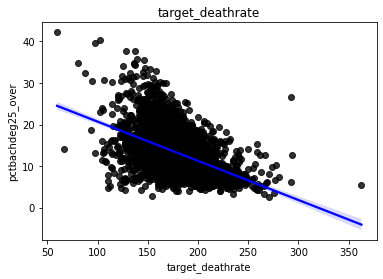

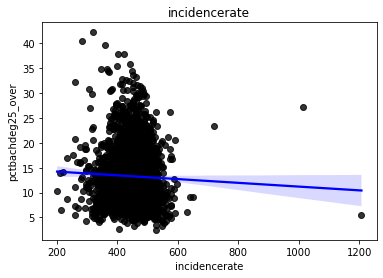

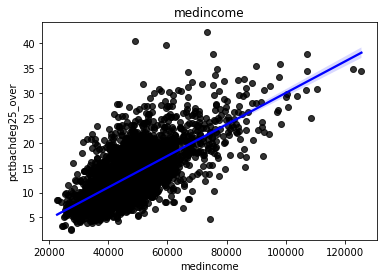

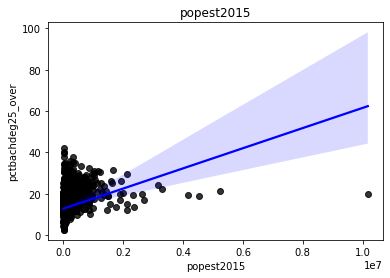

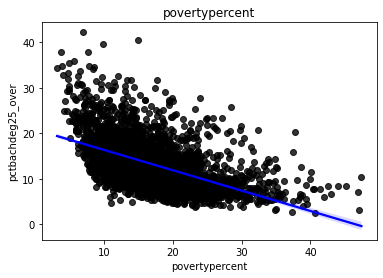

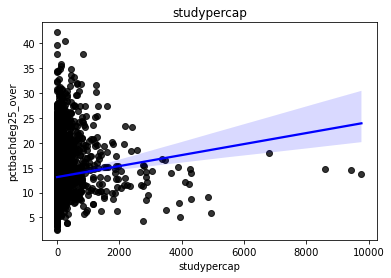

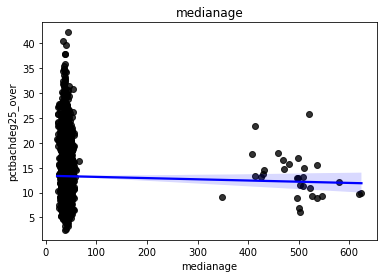

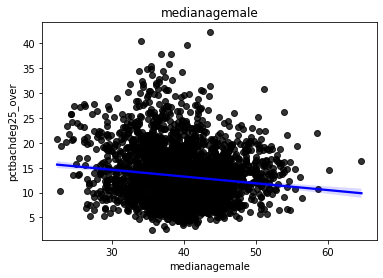

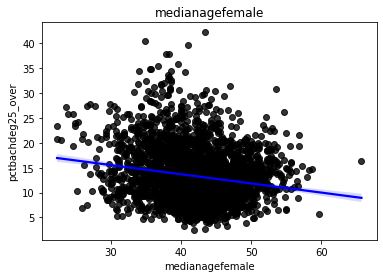

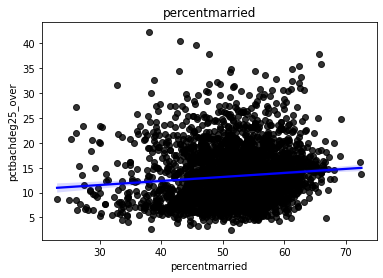

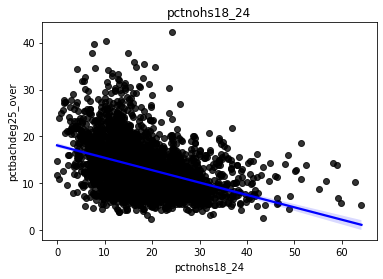

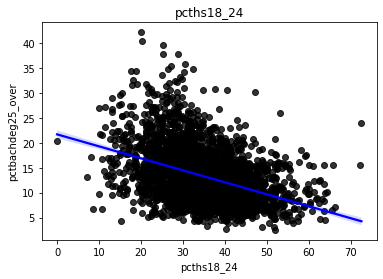

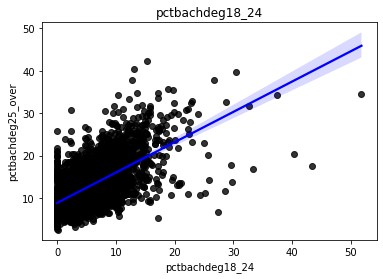

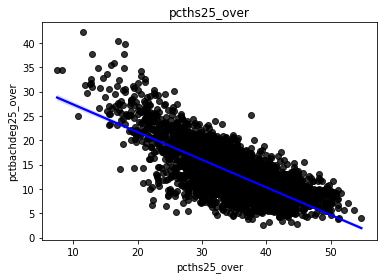

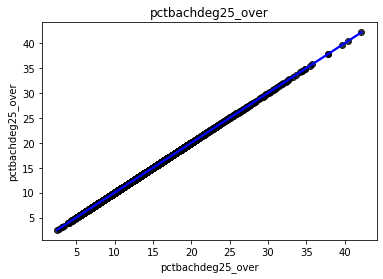

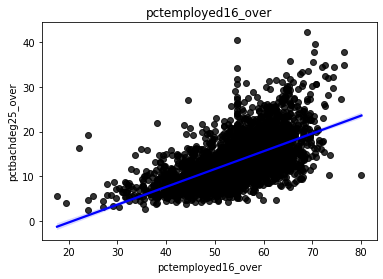

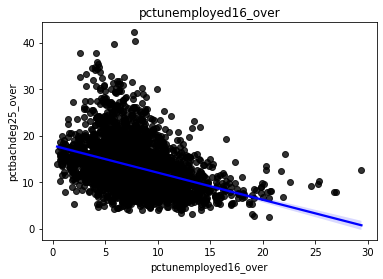

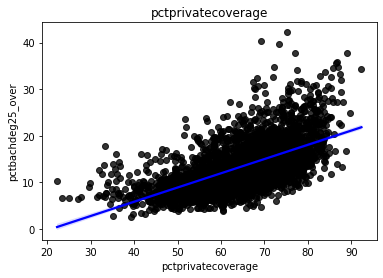

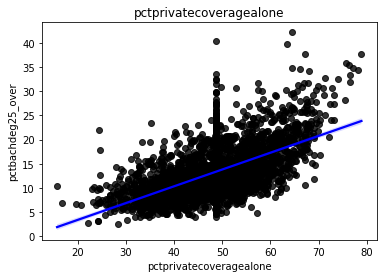

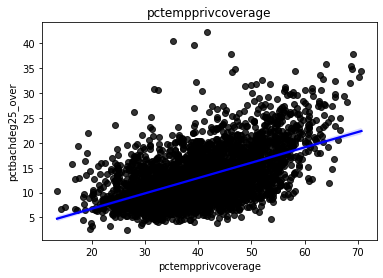

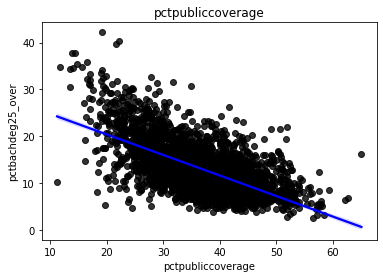

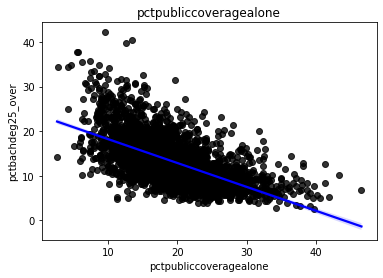

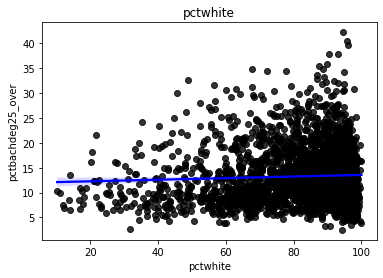

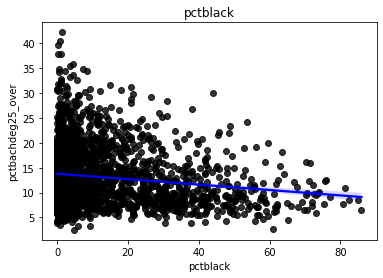

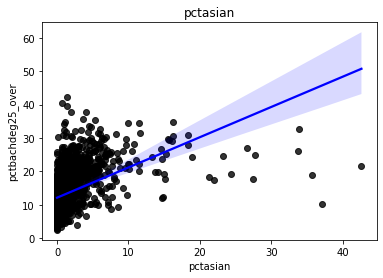

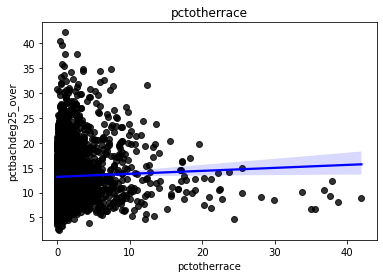

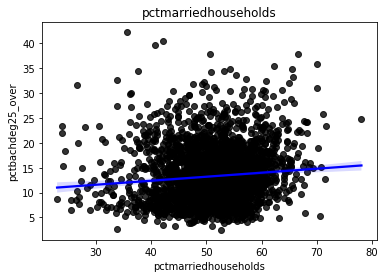

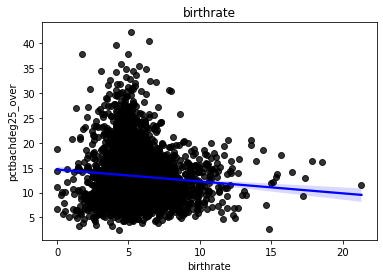

In [43]:
graph_reg(df2['pctbachdeg25_over'])

<AxesSubplot:xlabel='pctblack', ylabel='pctmarriedhouseholds'>

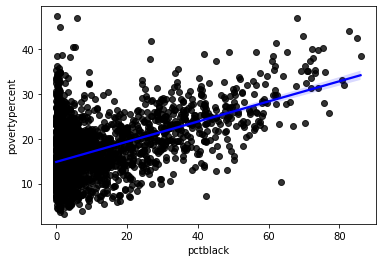

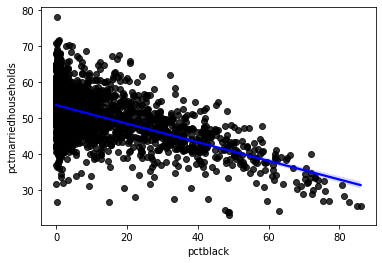

In [44]:
plt.figure()
sns.regplot(x=df2['pctblack'], y= df2['povertypercent'], scatter_kws={"color": "black"}, line_kws={"color": "blue"})
plt.figure()
sns.regplot(x=df2['pctblack'], y= df2['pctmarriedhouseholds'], scatter_kws={"color": "black"}, line_kws={"color": "blue"})

Constat:
- Argent est importante -> povertypercent/medincome
- Lien corréation positive Argent/Éducation/Emploi
- Mariage -> diminue le taux
- chomage -> + chomage = + cancer
- couverture maladie public < privé, problème de qualité du public
- Personne noir plus atteinte, - mariage, + pauvreté. Cela induirait une capacité moindre à se soigner du cancer, car soins aux USA sont très couteux et une plus faible stabilité que procure le mariage ce qui amènerait à des conduites à risques telles que la consommation de tabac.


### b. Matrice de corrélation

**Test des constats fait précédemment avec un test de corrélation**

In [45]:
df2_num = df2[numeric_col]
matrice_corr = df2_num.corr()
first_col = matrice_corr.pop('target_deathrate')
matrice_corr.insert(0, 'target_deathrate', first_col) 

<AxesSubplot:>

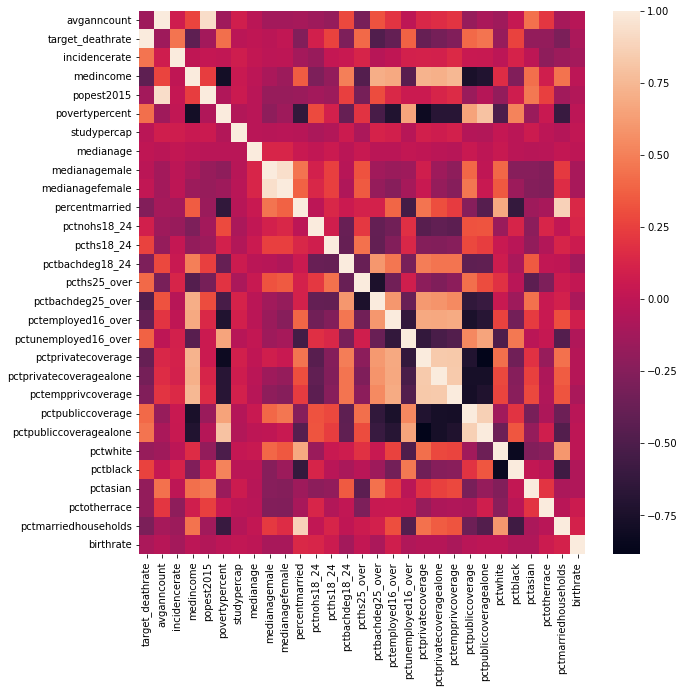

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(matrice_corr)

coefficient déterminant en dehors de l'intervalle ]0.2;-0.2[

In [47]:
var_imp_positive = matrice_corr['target_deathrate'].loc[matrice_corr['target_deathrate'] > 0.2 ]
var_imp_positive

target_deathrate          1.000000
incidencerate             0.449432
povertypercent            0.429389
pcths18_24                0.261976
pcths25_over              0.404589
pctunemployed16_over      0.378412
pctpubliccoverage         0.404572
pctpubliccoveragealone    0.449358
pctblack                  0.257024
Name: target_deathrate, dtype: float64

In [48]:
var_imp_negative = matrice_corr['target_deathrate'].loc[matrice_corr['target_deathrate'] < -0.2 ]
var_imp_negative

medincome                 -0.428615
percentmarried            -0.266820
pctbachdeg18_24           -0.287817
pctbachdeg25_over         -0.485477
pctemployed16_over        -0.397433
pctprivatecoverage        -0.386066
pctprivatecoveragealone   -0.326195
pctempprivcoverage        -0.267399
pctmarriedhouseholds      -0.293325
Name: target_deathrate, dtype: float64

Constat:

impact positif:
- Taux d'incidence
- Pauvreté
- Basse éducation
- chomage

impact négatif:
- Revenu
- Mariage
- Bonne éducation
- Couverture privé

Confirmation analyse graphique.

# III) Modélisation prédictive

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

## 1) Comparaison effet outlier
### a)Test df1 (Sans Outlier), Random Forest simple sans optimisation

In [50]:
y = df1['target_deathrate']
X = df1.drop(['target_deathrate','binnedinc', 'geography'], axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [210]:
def error_info(y,y_test,pred):
    print("Erreur Absolue Moyenne: ",
          round(mean_absolute_error(y_test,pred),2))
    print("Erreur Relative Moyenne: ",
          round((1 - ((y.mean() - 
                 mean_absolute_error(y_test,pred)) / y.mean()))*100,2),"%")

In [53]:
RFR = RandomForestRegressor(random_state=0)

In [54]:
RFR.fit(X_train,y_train)
prediction_1 = RFR.predict(X_test)

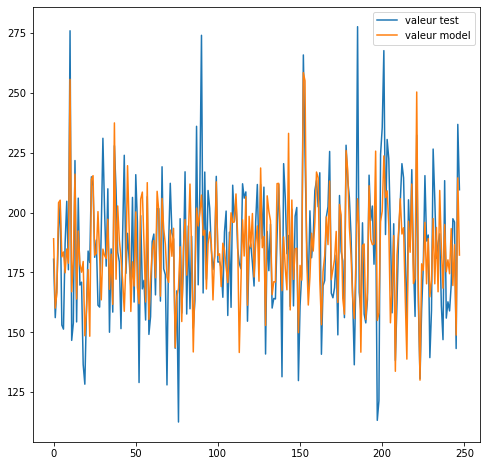

In [55]:
nb = []
for i in range(len(y_test)):
    nb.append(i)

plt.figure(figsize=(8,8))
plt.plot(nb, y_test, label='valeur test')
plt.plot(nb, prediction_1, label='valeur model')
plt.legend()

In [211]:
error_info(y,y_test,prediction_1)

Erreur Absolue Moyenne:  15.26
Erreur Relative Moyenne:  8.34 %


### b)Test df2 (avec Outlier), Random Forest simple sans optimisation

In [57]:
y2 = df2['target_deathrate']
X2 = df2.drop(['target_deathrate','binnedinc', 'geography'], axis=1)

In [95]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [59]:
RFR.fit(X2_train,y2_train)
prediction_2 = RFR.predict(X2_test)

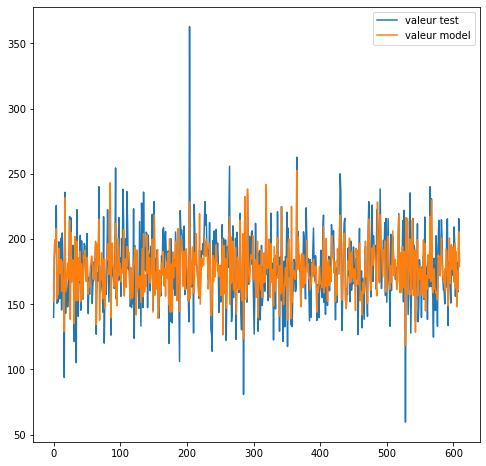

In [60]:
nb = []
for i in range(len(y2_test)):
    nb.append(i)

plt.figure(figsize=(8,8))
plt.plot(nb, y2_test, label='valeur test')
plt.plot(nb, prediction_2, label='valeur model')
plt.legend()

In [212]:
error_info(y2,y2_test,prediction_2)

Erreur Absolue Moyenne:  13.56
Erreur Relative Moyenne:  7.59 %


Meilleur avec Outlier, on conserve **df2**.   
Mais on observe une grande erreur avec les outiers de y, donc suppression des y outliers extrêmes.

**Comparaison à une prédiction identique à la moyenne à chaque itération (Pertinence du modèle).**

In [62]:
test_ = []
for i in range(len(y_test)):
    test_.append(y.mean())

In [213]:
error_info(y,y_test,test_)

Erreur Absolue Moyenne:  22.56
Erreur Relative Moyenne:  12.34 %


Le modèle à une erreur bien plus faible qu'une prédiction à la moyenne donc il est pertinent.

## 2) Optimisation du modèle

### Recherche paramètres optimaux

In [64]:
def GSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid='param_grid',
              numero_pred='X', X_train=X2_train,
              X_test=X2_test, y_train=y2_train, y_test=y2_test, y=y2):
    
    GSCV = GridSearchCV(estimator, param_grid)
    
    GSCV.fit(X_train,y_train)
    predictionCV = GSCV.predict(X_test)
    
    err_abs = round(mean_absolute_error(y_test,predictionCV),2)
    err_rlv = round((1 - ((y.mean() - 
                 mean_absolute_error(y_test,predictionCV)) / y.mean()))*100,2)
    
    print('Les meilleurs paramètres trouvés sont:\n \n',
          GSCV.best_params_,'\n \n',
          sep,'\n \n',
          'La prédiction',numero_pred,
          'à une:\n \n Erreur Moyenne Absolue de',err_abs,
          '\n Erreur Moyenne Relative de',err_rlv,'%')
    return GSCV

In [165]:
param_grid_1 = {'n_estimators' : [100, 200],
              'min_samples_leaf' : [1, 2],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4, 32, 64],
             }

In [166]:
GSCV_1 = GSearchCV(param_grid = param_grid_1, numero_pred = 1)

Les meilleurs paramètres trouvés sont:
 
 {'max_depth': 64, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 200} 
 
 -------------------------------------------------- 
 
 La prédiction 1 à une:
 
 Erreur Moyenne Absolue de 13.58 
 Erreur Moyenne Relative de 7.6 %


In [168]:
param_grid_2 = {'n_estimators' : [150,200,400],
              'min_samples_leaf' : [2, 3],
              'max_features': ['auto'],
              'max_depth': [48,64,128]
             }

In [169]:
GSCV_2 = GSearchCV(param_grid = param_grid_2, numero_pred = 2)

Les meilleurs paramètres trouvés sont:
 
 {'max_depth': 48, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 200} 
 
 -------------------------------------------------- 
 
 La prédiction 2 à une:
 
 Erreur Moyenne Absolue de 13.58 
 Erreur Moyenne Relative de 7.6 %


Meilleurs paramètres:  {'max_depth': 64, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 200} 

### Application

In [202]:
RFR2 = RandomForestRegressor(n_estimators=200,max_features='auto',max_depth=48, min_samples_leaf=2, random_state=0)

In [203]:
RFR2.fit(X2_train,y2_train)
prediction_3 = RFR2.predict(X2_test)

In [214]:
error_info(y2,y2_test,prediction_3)

Erreur Absolue Moyenne:  13.58
Erreur Relative Moyenne:  7.6 %


In [223]:
RFR3 = RandomForestRegressor(n_estimators=200, random_state=0)

In [224]:
RFR3.fit(X2_train,y2_train)
prediction_4 = RFR3.predict(X2_test)

In [225]:
error_info(y2,y2_test,prediction_3)

Erreur Absolue Moyenne:  13.58
Erreur Relative Moyenne:  7.6 %


In [227]:
RFR = RandomForestRegressor(random_state=0)

In [228]:
RFR.fit(X2_train,y2_train)
prediction_5 = RFR3.predict(X2_test)
error_info(y2,y2_test,prediction_5)

Erreur Absolue Moyenne:  13.55
Erreur Relative Moyenne:  7.58 %


Optimisation pas efficace, choix du retour au modèle de base.

## 3) Feature importance

In [217]:
importance = RFR.feature_importances_
importance

array([0.018963  , 0.20490166, 0.04901855, 0.02712251, 0.03274256,
       0.00519834, 0.01135643, 0.01198995, 0.01551829, 0.01599383,
       0.01788953, 0.02449185, 0.01744933, 0.04944679, 0.202053  ,
       0.02033691, 0.02478979, 0.03659851, 0.01245987, 0.01399048,
       0.01340226, 0.0351198 , 0.01584517, 0.03038894, 0.01714364,
       0.03297682, 0.02073313, 0.02207907])

In [218]:
importance = importance.tolist()

In [219]:
imp_df = pd.DataFrame(importance, columns = ['coef_imp'])

In [220]:
imp_df["feature_names"] = X2.columns

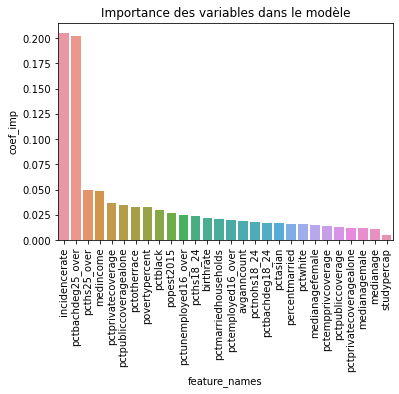

In [221]:
ax = sns.barplot(data = imp_df,
                 x = 'feature_names', y='coef_imp',
                 order = imp_df.sort_values('coef_imp',
                                            ascending= False).feature_names)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Importance des variables dans le modèle')
plt.show()

In [222]:
imp_df.loc[imp_df['coef_imp']>0.02].sort_values('coef_imp', ascending = False)

,coef_imp,feature_names
1,0.204902,incidencerate
14,0.202053,pctbachdeg25_over
13,0.049447,pcths25_over
2,0.049019,medincome
17,0.036599,pctprivatecoverage
21,0.035120,pctpubliccoveragealone
25,0.032977,pctotherrace
4,0.032743,povertypercent
23,0.030389,pctblack
3,0.027123,popest2015


Constat :

- L'éducation joue un rôle crucial. Peut-être dû à une connaissance plus accrue des causes des cancers et ainsi tendance à les éviter plus fortes

# Conclusion

- Éducation rôle primordial lié à la connaissance accrue des causes comme dit précédemment, mais aussi sur les revenus que possède la personne et ainsi la capacité de se soigner.

- Couverture maladie privée à un impact plus positif, du sûrement à la meilleure qualité des soins fournis dans le privé. 

- La stabilité de la personne affecte les chances de cancer. Le mariage et l'emploi sont des signes de stabilités qui ont un impact positif sur les chances de ne pas avoir un cancer. Surement dû au fait que la personne stable prend moins de risque et fait plus attention à elle et sa santé.